In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy  import fft
from math import pi, exp

In [2]:
c = 2000
f_m = 30
t_0 = 0.05
dt = 0.002
dx = 10

In [3]:
source_time_array = np.linspace(0, 3, 1501)

source_array = (1 - 2 * (pi * f_m * (source_time_array-t_0))**2) \
                * np.exp(-1 * ( pi * f_m * (source_time_array-t_0))**2)
source_time_derivative = 1 * (-4 * (pi * f_m * (source_time_array-t_0)) * pi * f_m * \
                         np.exp(-1 * ( pi * f_m * (source_time_array-t_0))**2) + \
                         (1 - 2 * (pi * f_m * (source_time_array-t_0))**2) * \
                         np.exp(-1 * ( pi * f_m * (source_time_array-t_0))**2) * \
                            -2 * (pi * f_m * (source_time_array-t_0)) * pi * f_m)

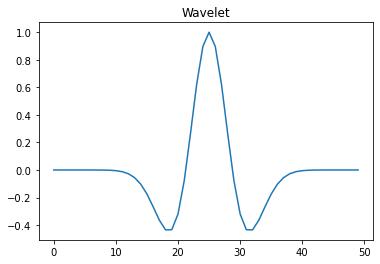

In [9]:
plt.plot(source_array[0:50])
plt.title('Wavelet')
plt.show()

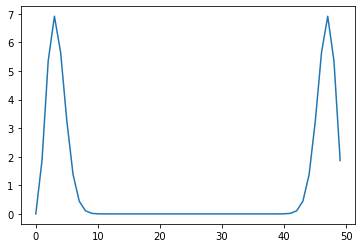

In [10]:
source_array_fft = np.fft.fft(source_array[0:50])
plt.plot(np.abs(source_array_fft.real))
plt.show()

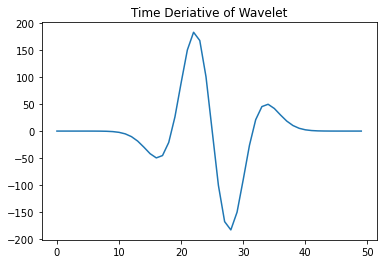

In [6]:
plt.plot(source_time_derivative[0:50])
plt.title('Time Deriative of Wavelet')
plt.show()

In [7]:
a_omega = np.fft.fft(source_time_derivative)

In [8]:
omega = np.linspace(0,1500,1501) / (dt * 1500)
x = np.linspace(0,10000,1501)

In [9]:
omega_mesh, x_mesh = np.meshgrid(omega, x)

In [10]:
sigma_x_w = -1 * a_omega * np.exp(complex(0,1) * omega_mesh * np.abs(x_mesh) / c) / (2 * omega_mesh * complex(0,1) + pow(10,-7))

In [11]:
result = np.fft.ifft(sigma_x_w)

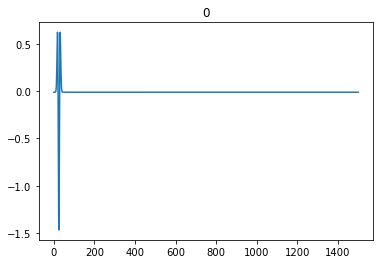

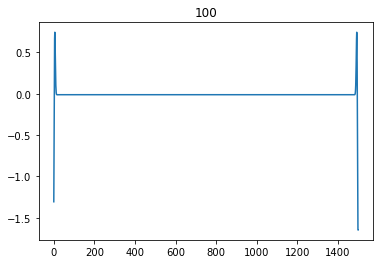

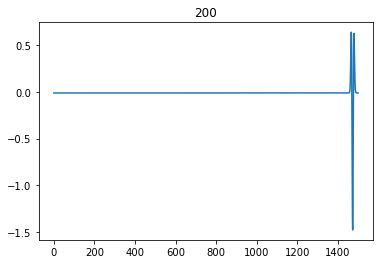

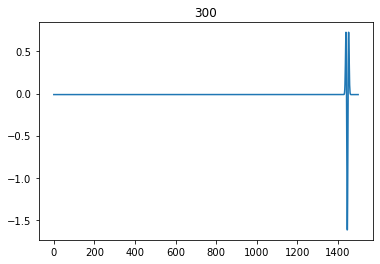

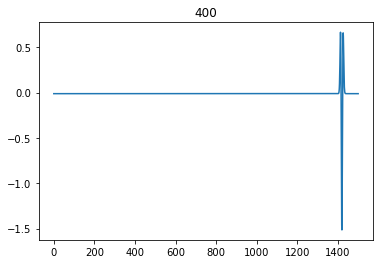

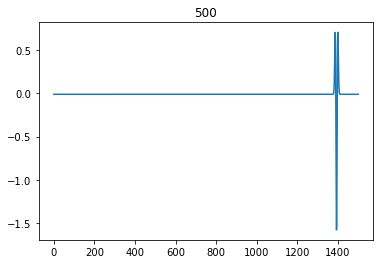

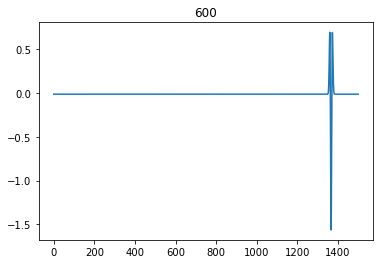

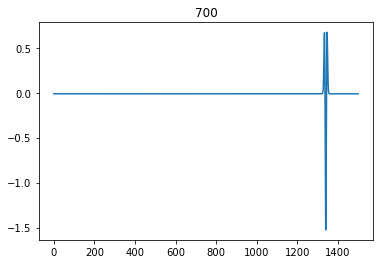

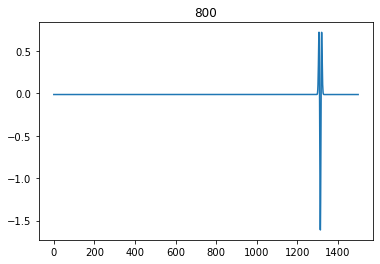

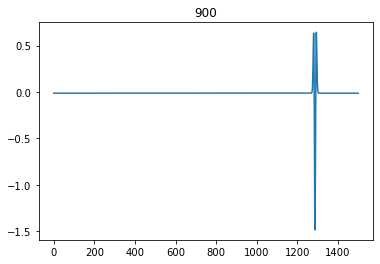

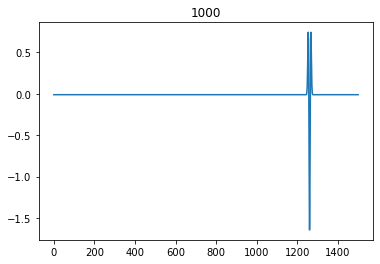

In [12]:
for i in range(1001):
    if i % 100 == 0:
        plt.plot(result[i,:].real)
        plt.title(str(i))
        plt.show()

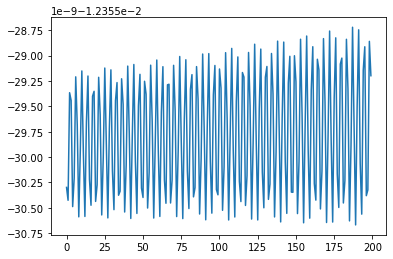

In [13]:
plt.plot(result[800:1000,750].real)
plt.show()

In [14]:
print(all(result[:,2].real==result[:,99].real))

False


In [15]:
# FD part

In [16]:
fd_time_array = np.arange(0, 3.+dt, dt)
# print(fd_time_array.size)
fd_x_array = np.arange(0,20000+dx, dx)
derivative_x_kernal = (1, -2, 1)
fd_u = np.zeros((fd_x_array.size, fd_time_array.size), dtype=float)
fd_delta = np.zeros(fd_x_array.size)
fd_delta[1000] = 1

In [17]:
for tk, tt in enumerate(fd_time_array):
    # print(tk)
    if tk>=2:
        u_xx = np.convolve(fd_u[:,tk-1], derivative_x_kernal, mode='same') * c**2 / (dx**2)
        u_xx += source_time_derivative[tk-1] * fd_delta   # add source item
        fd_u[:,tk] = u_xx * dt * dt + 2 * fd_u[:,tk-1] - fd_u[:,tk-2]
        # fd_u[1000,tk] -= source_time_derivative[tk-1]
        

<ipython-input-19-4cb608a163d2>:3: RuntimeWarning: invalid value encountered in true_divide
  return (data - np.min(data)) / _range


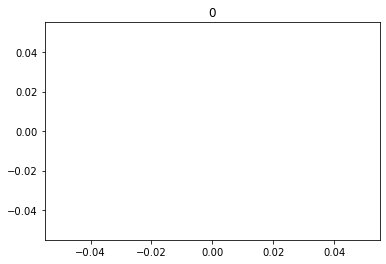

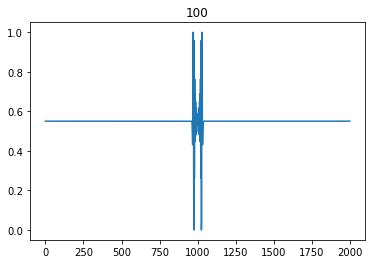

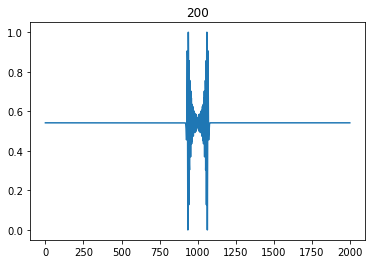

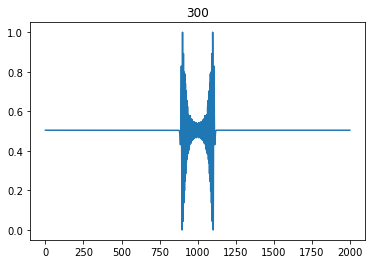

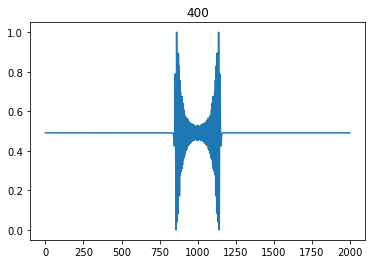

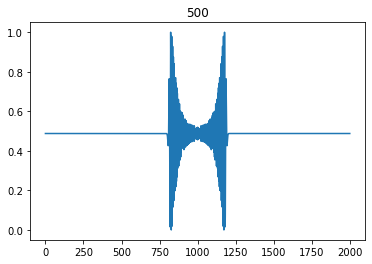

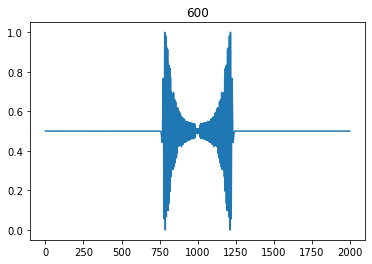

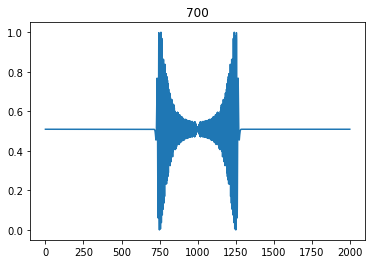

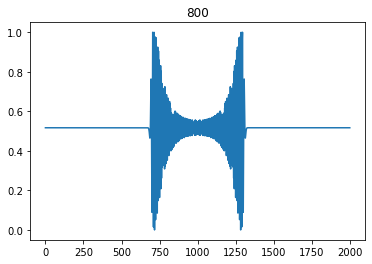

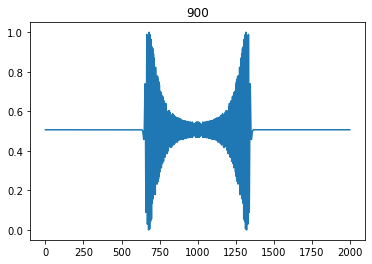

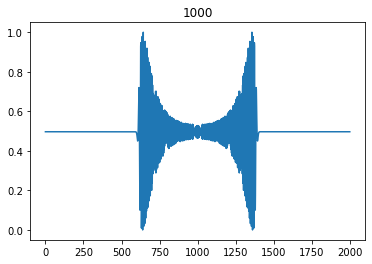

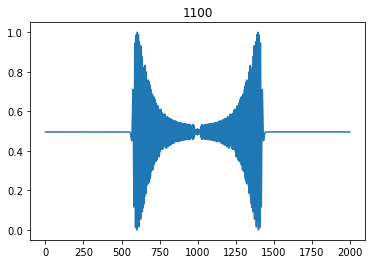

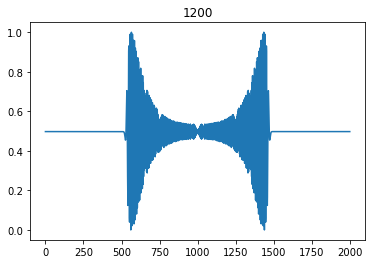

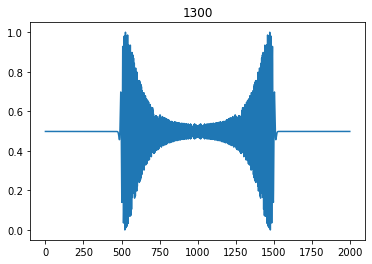

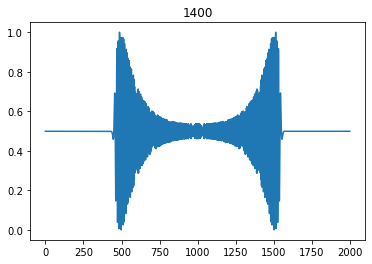

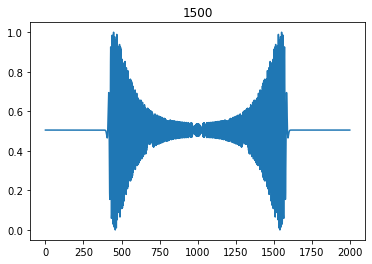

In [20]:
for i in range(1501):
    if i % 100 == 0:
        plt.plot(normalization(fd_u[:,i]))
        plt.title(str(i))
        plt.show()

In [19]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

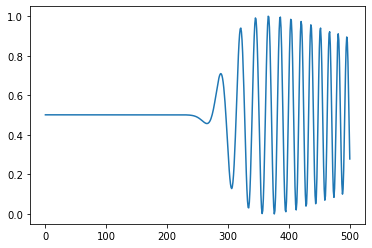

In [21]:
plt.plot(normalization(fd_u[500,1000:]))
# plt.title(str(i))
plt.show()

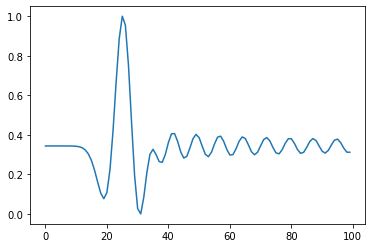

In [22]:
plt.plot(normalization(fd_u[1000,0:100]))
# plt.title(str(i))
plt.show()